# Project: Clicked on Ad - Logistic Regression Model  

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.despine()

In [3]:
# Reading in the data
df=pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Downloads\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\advertising.csv')

In [4]:
#Visually assessing the data
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
# Checking the data types of the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**No missing values in the dataset**

**Datatypes are also correct**

In [7]:
sum(df.duplicated())

0

**No duplicate records present in the dataset**

In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**1. **Average Daily Time Spent on Site is 65 minutes

**2. ** Average age is 36 years

**3. ** Average Daily Internet Usage is 180 minutes or 3 hours

**4. ** 48.1% of the customers are male

**5. ** Average Clicked on Ad rate is 50%

Let's use seaborn to explore the data

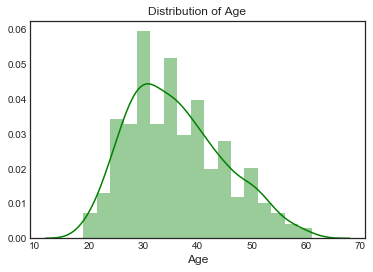

In [33]:
# Creating a histogram of the Age
sns.set_style('white')
sns.distplot(df['Age'], color='g')
plt.title('Distribution of Age', fontsize=12)
plt.xlabel('Age', fontsize=12);

- Average age is around 36 years

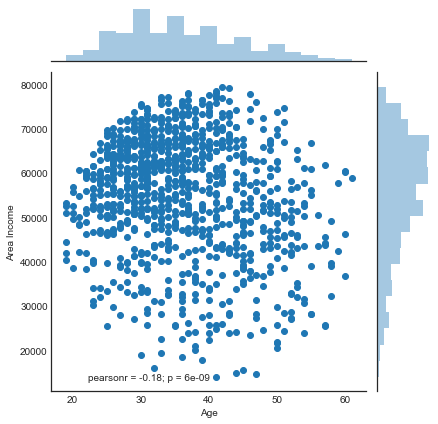

In [36]:
# Analyze Age vs Area Income
sns.jointplot(data=df, x='Age', y='Area Income');

- As age increases, area income increases. But closer to retirement age around 60 years, there is a decreasing trend in area income. 

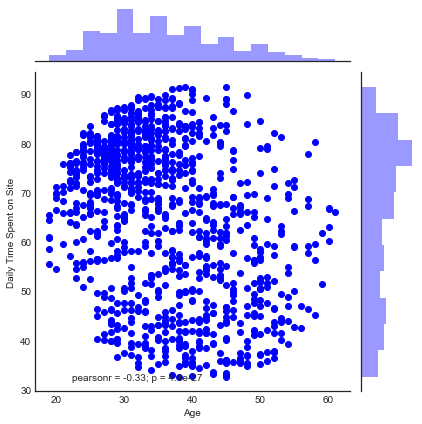

In [43]:
# Analyze Age vs Daily Time Spent on site
sns.jointplot(data=df, x='Age', y= 'Daily Time Spent on Site', color='b');

- Customers between 25 years and 45 years of age spend the highest amount of time on site

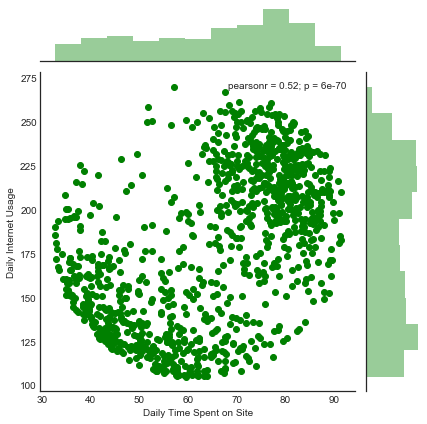

In [48]:
# Analyze Daily Time Spent on site vs Daily Internet Usage
sns.jointplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage', color='g');

- Looks like there are two clusters

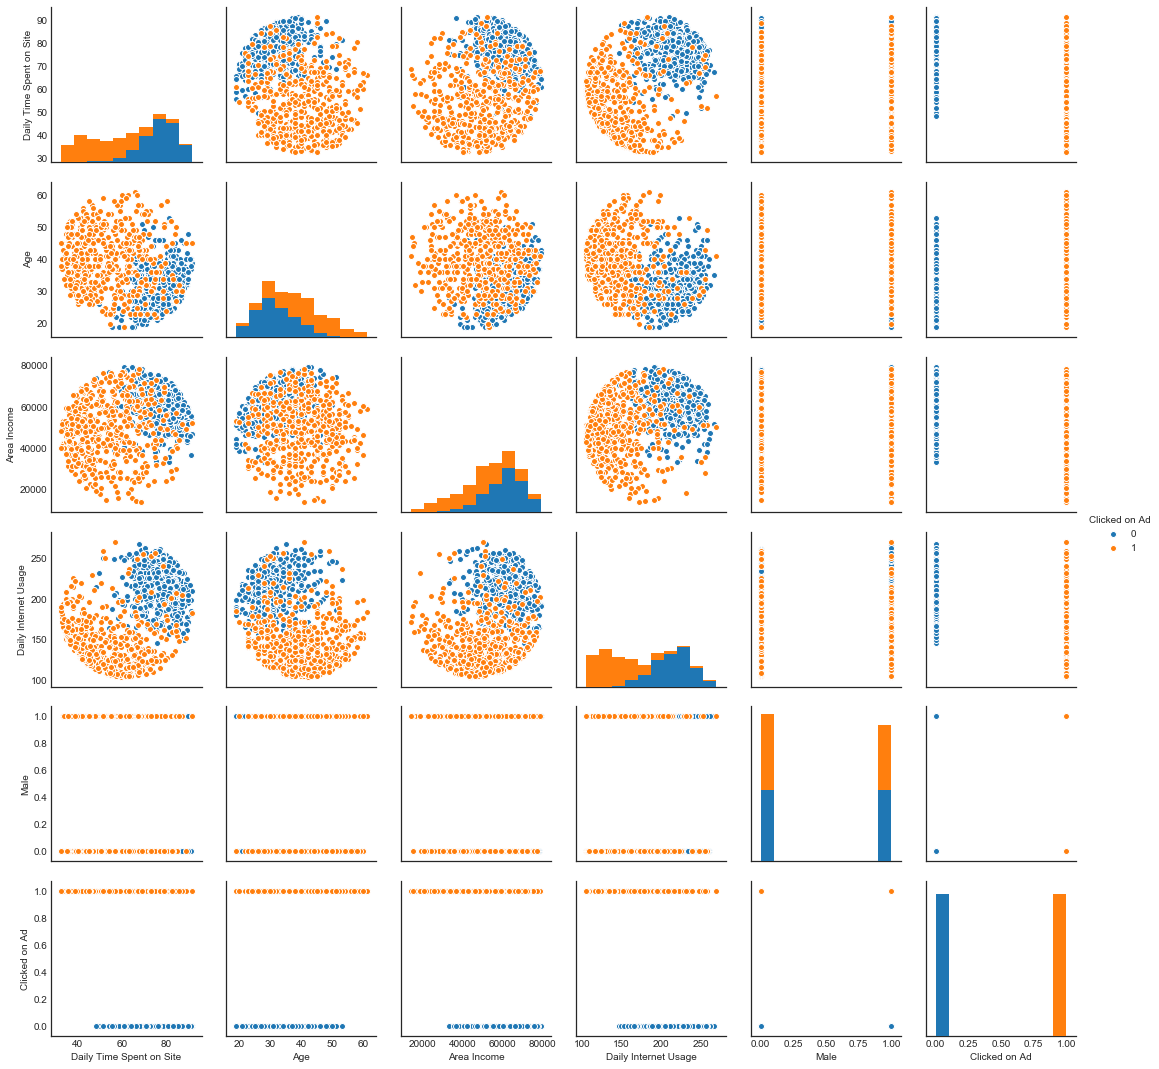

In [52]:
sns.pairplot(data=df, hue='Clicked on Ad');

In [66]:
# Number of unique countries in the data
df['Country'].nunique()

237

- There are too many countries and some have just one row. Creating dummy varibale to include Country variable will not prove very useful.

In [68]:
df['City'].nunique()

969

- 969 unique cities in a dataset with total of 1000 rows. This variable also cannot be used as a dummy variable in the logistic regression model.

# Logistic Regression

- Splitting the dataset into train and test datasets.
- Training the logistic regression model

In [53]:
from sklearn.cross_validation import train_test_split

In [85]:
# Setting the independent variables and dependent variable
X=df[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Male']]
y=df['Clicked on Ad']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

- So we have split the dataset into 30% for test and 70% for train. random_state ensures that results can be replicated. 

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
- Predicting values for the test data.

In [89]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       157
          1       0.96      0.94      0.95       143

avg / total       0.95      0.95      0.95       300



In [92]:
print(confusion_matrix(y_test, predictions))

[[152   5]
 [  9 134]]


In [95]:
print('Accuracy of logistic regression classifier on test dataset: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test dataset: 0.95


### Creating ROC Curve

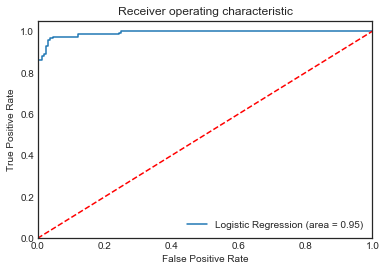

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')


- The receiver operating characteristic (ROC) curve is a tool used with binary classifiers to ascertain how good the model is. The dotted line represents the ROC curve if we had a random model; the more the gap between red dotted line and blue solid line, the better the model

- This model is a very good model